**3. Show that $f'(x)$ is 0 at least once in the given intervals.**

a. $f(x) = 1 - e^{x} + (e - 1)\sin{\frac{\pi x}{2}},\ [0,1]$

b. $f(x) = (x-1)\tan{x} + x \sin{\pi x},\ [0,1]$

c. $f(x) = x \sin{\pi x} - (x-2)\ln{x},\ [1,2]$

d. $f(x) = (x-2)\sin{x}\ln{(x+2)},\ [-1,3]$

In order to find that $f'(x)$ is 0 at least once, one only need to use Rolle's theorem, which states that if a function has the same value at the two extreme points in the interval, then there's at least a number **_c_** that satisfies $f'(c)=0$. Thus, we are going to use Python to define the functions, evaluate them at the given points in the intervals, and plot them just to see what we're working with.

In [17]:
# Use modules to plot and finding the minimum of a function
using Optim
using Plots
using Printf
pyplot()

Plots.PyPlotBackend()

a. $f(x) = 1 - e^{x} + (e - 1)\sin{\frac{\pi x}{2}},\ [0,1]$

In [33]:
# Define the function
f_a(x) = 1.0 - exp(x) + (exp(1)-1.0)*sin(pi*x/2.0)

# Evaluate at both points
@printf("f(x = 0): %.3f\nf(x = 1): %.3f", f_a(0), f_a(0))

f(x = 0): 0.000
f(x = 1): 0.000

Now that we have found that both values are the same, we have satisfied Rolle's theorem conditions, so there must be a number _c_ such that $f'(c) = 0$. We can look at the plot of the function and see where that number _c_ is located.

In [25]:
range_a = range(0, stop = 1, step = 0.01)
plot(range_a, f_a.(range_a), label = "Function f_a", size = (420, 280))

So there appears to be a maximum between $[0.4,0.6]$, so we can find that value $c$
by using a special routine within
**Optim** in order to find that value, that is, __optimize__.

In [83]:
# Optimize returns the value of the local minimum, so we must convert the function
# into a reflection of itself in order to use it, so we can obtain a local maximum
df_a_root = Optim.minimizer(optimize(x->-f_a(x), 0.3, 0.7))

# We can now plot both functions just to check if it's the right value
plot(range_a, f_a.(range_a), size = (420, 280), label = "Function")
plot!(range_a, fill(f_a.(df_a_root), length(range_a)), label = "Maximum")

The fact that the function evaluated at the root of $f'(c) = 0$ is a constant line proves that we found the correct value of _c_, which is a local maximum.

b. $f(x) = (x-1)\tan{x} + x \sin{\pi x},\ [0,1]$

In [48]:
f_b(x) = (x - 1.0)*tan(x) + (x*sin(pi*x))

# Evaluate the function at both endpoint of the interval
@printf("f(x = 0): %4f\nf(x = 1): %.4f", f_b(0), f_b(1))

f(x = 0): 0.000000
f(x = 1): 0.0000

Both values are the same, so Rolle's theorem holds. Now that we know this, we will plot both the function and the derivative at the point _c_ such that $f'(c) = 0.$

In [49]:
range_b = range(0.0, stop = 1.0, length = 50) |> collect
plot(range_b, f_b.(range_b), label = "Function")

We can see with the plot that there are actually two point were $f'(x) = 0$, i.e there is a local maxima and a local minima within the interval. One is between $x \in [0,0.2]$ and the other one is between $x \in [0.6,0.8]$. We can calculate them and plot them, as we did before.

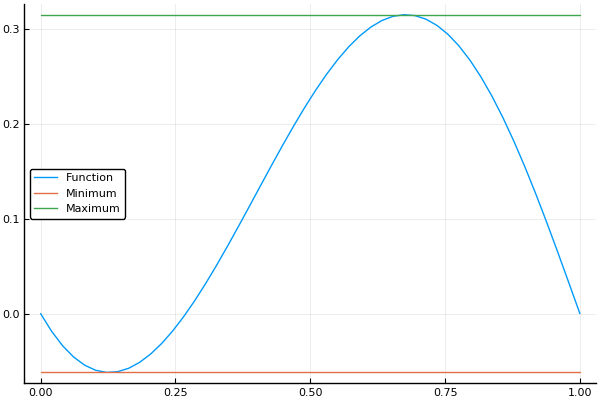

In [78]:
# These are the c1 and c2 values that make the derivative 0.
df_b_1 = Optim.minimizer(optimize(f_b, 0.0, 0.3)) # Minimum
df_b_2 = Optim.minimizer(optimize(x -> -f_b(x), 0.6, 0.8)) # Maximum (same as before)

# Plot both lines and the function
plot(range_b, f_b.(range_b), label = "Function")
plot!(range_b, fill(f_b.(df_b_1), length(range_b)), label = "Minimum")
plot!(range_b, fill(f_b.(df_b_2), length(range_b)), label = "Maximum")

As stated before, the fact that both lines cross the maximum and minimum, and that both are constant functions (i.e. they are horizontal lines) prove that the values are correct.

c. $f(x) = x \sin{\pi x} - (x-2)\ln{x},\ [1,2]$

In [86]:
f_c(x) = x*sin(pi*x) - (x-2.0)*log(x)

# Evaluate the function at the endpoints of the interval
@printf("f(x=1): %2f\nf(x=2): %.2f", f_c(1), f_c(2))

f(x=1): 0.000000
f(x=2): -0.00

Again, Rolle's theorem holds, so we can do what we have been doing so far: plot the function, find either maxima or minima, and plot it again to see how it all worked out.

In [89]:
range_c = range(1.0, stop = 2.0, length = 50) |> collect
plot(range_c, f_c.(range_c), label = "Function")

This time, there's only one point _c_ where $f'(c) = 0,$
so we only need to use **optimize** to find that point, then we can plot the result.

In [92]:
df_c = Optim.minimizer(optimize(f_c, 1.5, 1.8)) # We start at 1.4 because we know that c is

# Plot the function and the constant line with the value found
plot(range_c, f_c.(range_c), label = "Function")
plot!(range_c, fill(f_c.(df_c), length(range_c)), label = "Minimum")

d. $f(x) = (x-2)\sin{x}\ln{(x+2)},\ [-1,3]$

In [94]:
f_d(x) = (x-2.0)*sin(x)*log(x+2.0)

range_d = range(-1.0, stop = 3, length = 50) |> collect
plot(range_d, f_d.(range_d), label = "Function")

This function is quite nice, it has two maximum and a minimum, and one of those maximum appears to be a global maximum, but we can find this values within smaller intervals to the given one. So, the first one would be between $x \in [-1,-0.5],$ the next one would be between $x \in [0.5,1.5],$ and the last one would be in the interval $x \in [2.0,3.0].$

In [97]:
df_d_1 = Optim.minimizer(optimize(x-> -f_d(x), -1.0, -0.5)) # Maximum
df_d_2 = Optim.minimizer(optimize(f_d, 0.5, 1.5))
df_d_3 = Optim.minimizer(optimize(x-> -f_d(x), 2.0, 3.0))

plot(range_d, f_d.(range_d), label = "Function")
short_line = range(-1.0, stop = 1.0, step = 0.1)
plot!(short_line, fill(f_d.(df_d_1), length(short_line)), label = "First maximum")
plot!(range_d, fill(f_d.(df_d_2), length(range_d)), label = "Global minimum")
short_line = range(1.5, stop = 3.0, step = 0.1)
plot!(short_line, fill(f_d.(df_d_3), length(short_line)), label = "Second maximum")